In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('buy_or_not.csv')
df2 = pd.read_csv('quaterly_prices.csv')


In [3]:
df1.head()

,numords,totdol,last,buy
0,7,493,207,1
1,4,423,625,0
2,4,246,28,0
3,3,271,778,0
4,2,148,396,0


In [5]:
#whether have null value
df1.isnull().sum()

numords    0
totdol     0
last       0
buy        0
dtype: int64

In [6]:
print(df1.dtypes)

numords    int64
totdol     int64
last       int64
buy        int64
dtype: object


What percentage of customers bought? Show the summary
statistics of how much they spent.

In [19]:
md = [2,
4,
6,
8,
10]

tg = [98,
88,
49,
44,
29]

vd = [107,
102,
98,
102,
146]
al = [sum(x) for x in zip(tg, vd)]

In [20]:
al

[205, 190, 147, 146, 175]

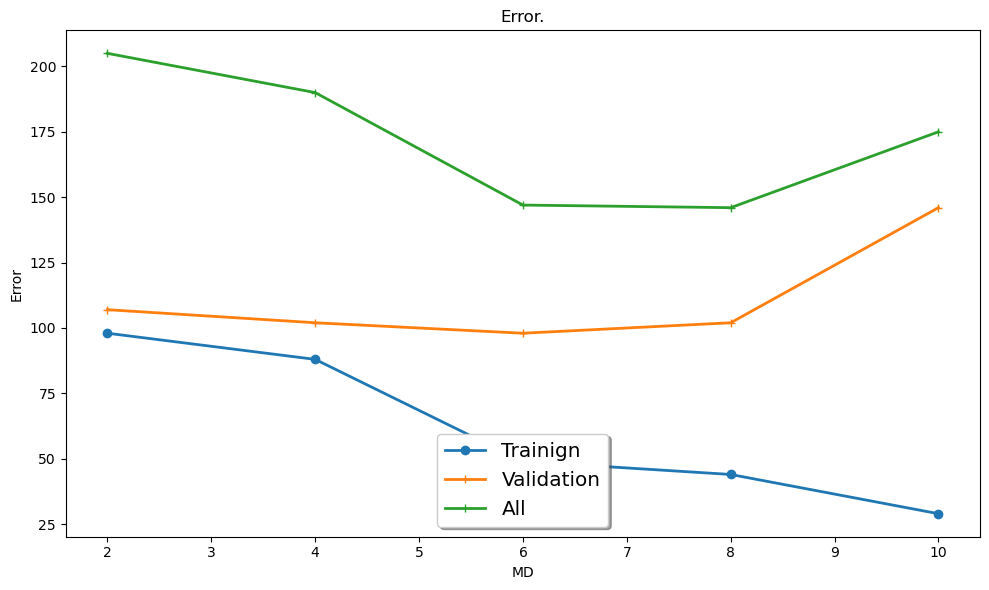

In [21]:

plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(md, tg, 'o-', linewidth=2, label = 'Trainign')
plt.plot(md, vd, '+-', linewidth=2, label = "Validation")
plt.plot(md, al, '+-', linewidth=2, label = "All")

#customization
#plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('MD')
plt.ylabel('Error')
plt.title('Error.')
legend = plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()



In [ ]:
#percentage of customers bought ("YES") from the test catalogue
num_buyers = df['buyer'].value_counts()['yes']
percent_buyers = (num_buyers / df.shape[0]) * 100

print(f"{percent_buyers:.2f}% of customers bought from the test catalog")
#statistics summary of how much spent

summary_stats = df.groupby('buyer')['dollars'].describe()
print(summary_stats)

2.46% of customers bought from the test catalog

In [2]:
# Calculate the quintiles for Recency (last), Frequency (numords), and Monetary Value (totdol)
R_quantiles = df["last"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).unique()
F_quantiles = df["numords"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).unique()
M_quantiles = df["totdol"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).unique()

In [3]:
R_quantiles

array([1.000e+00, 1.400e+02, 3.460e+02, 5.130e+02, 7.460e+02, 3.797e+03])

In [4]:
F_quantiles

array([  1.,   2.,   3.,   5., 195.])

In [5]:
M_quantiles

array([2.0000e+00, 7.4000e+01, 1.4100e+02, 2.4000e+02, 4.4800e+02,
       2.1316e+04])

In [6]:
df['r_qui'] = pd.qcut(df['last'], q = 5, labels=False, duplicates='drop')
df['f_qui'] = pd.qcut(df['numords'],q = 6, labels=False, duplicates='drop')
df['m_qui'] = pd.qcut(df['totdol'],q = 5, labels=False, duplicates='drop')

In [7]:
# Assign quintile labels to each observation for Recency (last), Frequency (numords), and Monetary Value (totdol)
df["R_quintile"] = pd.cut(df["last"], bins=R_quantiles, labels=[1, 2, 3, 4, 5], include_lowest=True, right=True)
df["F_quintile"] = pd.cut(df["numords"], bins=F_quantiles, labels=[1, 2, 3, 4,5], include_lowest=True, right=True)
df["M_quintile"] = pd.cut(df["totdol"], bins=M_quantiles, labels=[1, 2, 3, 4, 5], include_lowest=True, right=True)

ValueError: Bin labels must be one fewer than the number of bin edges

In [11]:
df['f_qui'].value_counts()

0    53721
2    15729
3    15723
1    11378
Name: f_qui, dtype: int64